 # Who are the Bossy Words?

In this activity you will use TF-IDF to find the most relevant words in news articles that talk about money in the [Reuters Corpus](https://www.nltk.org/book/ch02.html#reuters-corpus) bundled in `NLTK`. Once you find the most relevant words, you should create a word cloud.

In [19]:
# initial imports
import nltk
from nltk.corpus import reuters
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use("seaborn-whitegrid")
mpl.rcParams["figure.figsize"] = [20.0, 10.0]


 ## Loading the Reuters Corpus

 The first step is to load the Reuters Corpus.

In [20]:
# Download/update the Reuters dataset
nltk.download("reuters")


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/satishsurath/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

 ## Getting the News About Money

 You will analyze only news that talks about _money_. There are two categories in the Reuters Corpus that talk about money: `money-fx` and `money-supply`. In this section, you will filter the news by these categories.

 Take a look into the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus) and check how you can retrieve the categories of a document using the `reuters.categories()` method; write some lines of code to retrieve all the news articles that are under the `money-fx` or the `money-supply` categories.

 **Hint:**
 You can use a comprehension list or a for-loop to accomplish this task.

In [21]:
# Getting all documents ids under the money-fx and money-supply categories
categories = ["money-fx", "money-supply"]
all_docs_id = reuters.fileids()
print(len(all_docs_id))


10788


In [22]:
# Creating the working corpus containing the text from all the news articles about money
corpus_id = all_docs_id[0:1000]
corpus = [reuters.raw(doc) for doc in corpus_id]

# Printing a sample article
print(corpus[100])

CITYTRUST BANCORP INC &lt;CITR> 1ST QTR NET
  Shr 1.40 dlrs vs 1.16 dlrs
      Net 5,776,000 vs 4,429,000
      Avg shrs 4,132,828 vs 3,834,117
  




 ## Calculating the TF-IDF Weights

 Calculate the TF-IDF weight for each word in the working corpus using the `TfidfVectorizer()` class. Remember to include the `stop_words='english'` parameter.

In [23]:
# Calculating TF-IDF for the working corpus.
# Getting the TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X_corpus = vectorizer.fit_transform(corpus)

print(X_corpus)


  (0, 3653)	0.02349374154800046
  (0, 3572)	0.03401531227145892
  (0, 9282)	0.023258637913775613
  (0, 9251)	0.02895058701961889
  (0, 5736)	0.031788665087932794
  (0, 5876)	0.04269766365167542
  (0, 5004)	0.02382046223442031
  (0, 5281)	0.04421016230849752
  (0, 5595)	0.04421016230849752
  (0, 8051)	0.03951191235503726
  (0, 5798)	0.037999413698215155
  (0, 7395)	0.04041700708351447
  (0, 3186)	0.07352722462649618
  (0, 6900)	0.03152282152841889
  (0, 7263)	0.03871356222491918
  (0, 4079)	0.031267012229669745
  (0, 1746)	0.04890841226195779
  (0, 6009)	0.04890841226195779
  (0, 9449)	0.04890841226195779
  (0, 6839)	0.03571875713005421
  (0, 3204)	0.029906837778906972
  (0, 8301)	0.036221071481879155
  (0, 5719)	0.03951191235503726
  (0, 3623)	0.04146186226670836
  (0, 8287)	0.04890841226195779
  :	:
  (999, 6787)	0.1736525446693858
  (999, 7495)	0.2329994914132017
  (999, 7225)	0.11157842602334767
  (999, 6428)	0.09972089581992194
  (999, 2491)	0.36059064178695793
  (999, 7187)	0.0868

In [24]:
# Getting matrix info
print(f"Matrix shape: {X_corpus.shape}")
print(f"Total number of documents: {X_corpus.shape[0]}")
print(f"Total number of unique words (tokens): {X_corpus.shape[1]}")

Matrix shape: (1000, 9489)
Total number of documents: 1000
Total number of unique words (tokens): 9489


In [25]:
# Retrieve words list from corpus
words_corpus = vectorizer.get_feature_names()
print(words_corpus)

['00', '000', '0000', '001', '002', '003', '004', '005', '007', '008', '009', '01', '010', '011', '012', '013', '014', '015', '017', '018', '019', '02', '020', '021', '022', '023', '025', '027', '028', '029', '03', '030', '031', '032', '033', '034', '036', '037', '039', '04', '040', '0400', '042', '044', '045', '047', '049', '05', '050', '051', '053', '054', '055', '056', '057', '058', '059', '05p', '06', '060', '061', '062', '063', '064', '065', '066', '067', '069', '07', '070', '073', '076', '078', '08', '080', '081', '0838', '085', '086', '087', '088', '089', '09', '090', '0905', '0930', '094', '095', '096', '098', '099', '0p', '10', '100', '1000', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '1100', '111', '112', '113', '114', '115', '116', '117', '118', '11895', '119', '12', '120', '1200', '121', '122', '123', '124', '125', '126', '12664', '127', '128', '129', '13', '130', '131', '132', '133', '1330', '134', '135', '136', '137', '1375', '138', '139',

/Users/satishsurath/opt/anaconda3/envs/dev3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 Create a DataFrame representation of the TF-IDF weights of each term in the working corpus. Use the `sum(axis=0)` method to calculate a measure similar to the term frequency based on the TF-IDF weight, this value will be used to rank the terms for the word cloud creation.

In [29]:
# Creating a DataFrame Representation of the TF-IDF results
#money_news_df = pd.DataFrame(
#    list(zip(words_corpus, np.ravel(X_corpus.mean(axis=0)))), columns=["Word", "TF-IDF"]
#)


# Order the DataFrame by word frequency in descending order
#money_news_df = money_news_df.sort_values(by=["TF-IDF"], ascending=False)




# Creating a DataFrame Representation of the TF-IDF results
money_news_df_with_freq = pd.DataFrame(
    list(zip(vectorizer.get_feature_names(), np.ravel(X_corpus.sum(axis=0)))),
    columns=["Word", "Frequency"],
)

# Order the DataFrame by word frequency in descending order
money_news_df_with_freq = money_news_df_with_freq.sort_values(by=["Frequency"], ascending=False)

# Print the top 10 words
money_news_df_with_freq.head(10)




/Users/satishsurath/opt/anaconda3/envs/dev3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,Frequency
9199,vs,79.701292
5885,mln,61.460293
2971,cts,51.220982
1,000,47.185150
7680,said,45.466360
6083,net,38.892098
3391,dlrs,38.615440
6495,pct,28.682001
7953,shr,27.749378
5538,lt,27.099914


In [30]:
money_news_df_with_freq.head(10)

,Word,Frequency
9199,vs,79.701292
5885,mln,61.460293
2971,cts,51.220982
1,000,47.185150
7680,said,45.466360
6083,net,38.892098
3391,dlrs,38.615440
6495,pct,28.682001
7953,shr,27.749378
5538,lt,27.099914


 ## Retrieving the Top Words

 In order to create the word cloud you should get the top words; in this case we will use a rule of thumb that has been empirically tested by some NLP experts that states that words with a frequency between 10 and 30 might be the most relevant in a corpus.

 Following this rule, create a new DataFrame containing only those words with the mentioned frequency.

In [31]:
# Top words will be those with a frequency between 10 ans 30 (thumb rule)
top_words = money_news_df_with_freq[
    (money_news_df_with_freq["Frequency"] >= 10) & (money_news_df_with_freq["Frequency"] <= 30)
]



top_words.head(10)


,Word,Frequency
6495,pct,28.682001
7953,shr,27.749378
5538,lt,27.099914
1945,billion,26.848725
5519,loss,24.456389
7042,qtr,22.754757
9450,year,20.479628
238,1986,18.722933
8756,tonnes,18.716347
253,1st,17.828151


 ## Creating Word Cloud

 Now you have all the pieces needed to create a word cloud based on TF-IDF weights, so use the `WordCloud` library to create it.

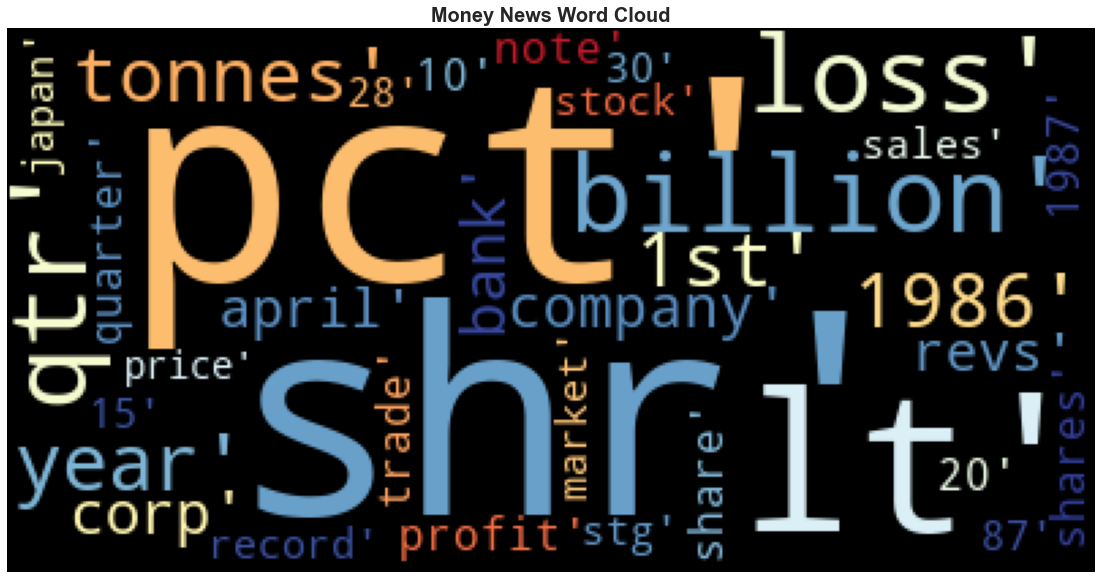

In [32]:
# Create a string list of terms to generate the word cloud
terms_list = str(top_words["Word"].tolist())

# Create the word cloud

wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()

## Challenge: Looking for Documents that Contain Top Words

 Finally you might find it interesting to search those articles that contain the most relevant words. Create a function called `retrieve_docs(terms)` that receives a list of terms as parameter and extracts from the working corpus all those news articles that contain the search terms. In this function you should use the `reuters.words()` method to retrieve the tokenized version of each article as can be seen in the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus).

 **Hint:** To find any occurrence of the search terms you might find it useful to check out [this post on StackOverflow](https://stackoverflow.com/a/25102099/4325668). You should also lowercase all the words to ease your terms search.

In [34]:
def retrieve_docs(terms):
    result_docs = []
    for doc_id in money_news_ids:
        found_terms = [
            word
            for word in reuters.words(doc_id)
            if any(term in word.lower() for term in terms)
        ]
        if len(found_terms) > 0:
            result_docs.append(doc_id)
    return result_docs


 ### Question 1: How many articles talk about Yen?

In [35]:
len(retrieve_docs(["yen"]))


NameError: name 'money_news_ids' is not defined

### Question 2: How many articles talk about Japan or Banks?

In [ ]:
len(retrieve_docs(["japan", "banks"]))


 ### Question 3: How many articles talk about England or Dealers?

In [ ]:
len(retrieve_docs(["england", "dealers"]))
